##  Task 2
Purba Devi

Image to Pencil Sketch with Python

Image Description:

We need to read the image in RBG format and then convert it to a grayscale image. This will turn an image into a classic black and white photo. Then the next thing to do is invert the grayscale image also called negative image, this will be our inverted grayscale image. Inversion can be used to enhance details. Then we can finally create the pencil sketch by mixing the grayscale image with the inverted blurry image. This can be done by dividing the grayscale image by the inverted blurry image. Since images are just arrays, we can easily do this programmatically using the divide function from the cv2 library in Python.

In [4]:
# Importing all the essential libraries.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [6]:
# Reading the Image and converting it into an matrix.
image = cv2.imread("photo.jpg",0)
image

array([[245, 251, 254, ..., 255, 255, 255],
       [251, 255, 254, ..., 255, 255, 255],
       [251, 252, 254, ..., 255, 255, 255],
       ...,
       [153, 162, 168, ..., 188, 184, 182],
       [146, 165, 177, ..., 182, 177, 175],
       [149, 172, 191, ..., 176, 175, 176]], dtype=uint8)

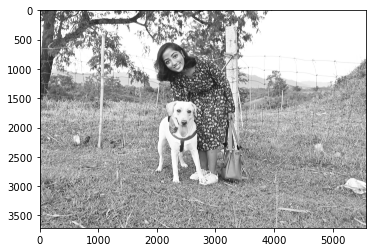

In [7]:
# Converting the image into RGB formate.
# We use this so that we should not use the above function to display our image.
img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [8]:
# Creating the image into a grey scale image.
grey = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
grey

array([[245, 251, 254, ..., 255, 255, 255],
       [251, 255, 254, ..., 255, 255, 255],
       [251, 252, 254, ..., 255, 255, 255],
       ...,
       [153, 162, 168, ..., 188, 184, 182],
       [146, 165, 177, ..., 182, 177, 175],
       [149, 172, 191, ..., 176, 175, 176]], dtype=uint8)

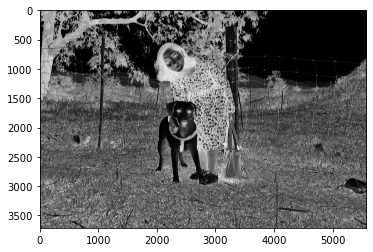

In [9]:
# Now, we will invert the image which we have just converted into a gray scale.
negative = 255 - img # Subtract the inverted image from 255 to get the grey image
plt.imshow(negative)
# This image is also known as negative image.

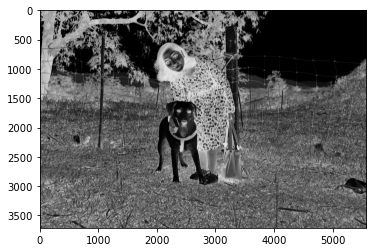

In [10]:
# Gaussian Smoothing of image, we will use gaussian function. It will blurr the negative/inverted image.
blurred = cv2.GaussianBlur(negative, (21,21),0)
plt.imshow(blurred)

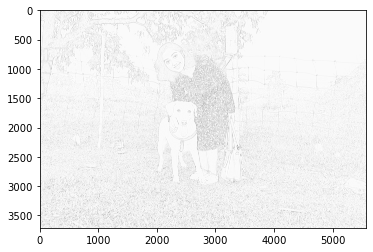

In [11]:
# here we are creating a function 'dodge', which will take gray and inverse image as a mask and convert the image into dodge image.
def dodge_img(x,y):
    return cv2.divide(x,255-y,scale=250)
dodged_img=dodge_img(img,blurred)
plt.imshow(dodged_img)

In [12]:
# Here we are taking a function and making the image smooth and dark.
def burn_img(image, mask):
    return 255 - (cv2.divide(255-image, 255-mask, scale=200))
final_image=burn_img(dodged_img,blurred)

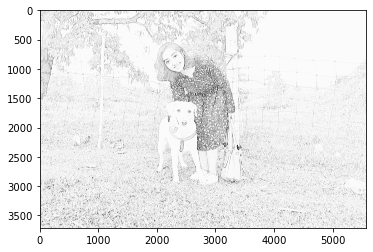

In [13]:
plt.imshow(final_image)